<a href="https://colab.research.google.com/github/sike990/HandsOn-ML/blob/main/HandsOnML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Info

In [1]:
!git clone https://github.com/sike990/HandsOn-ML.git

Cloning into 'HandsOn-ML'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 35 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 953.77 KiB | 5.39 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
import pandas as pd
import os
import tarfile
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_housing_data():
  # The housing.tgz file is located directly under the "Housing" directory, not under a subfolder called "Housing".
  with tarfile.open("/content/HandsOn-ML/HousingD/housing.tgz") as housing_tar:
    housing_tar.extractall(path="/content/HandsOn-ML/HousingD")
  # Also, the CSV file is named "housing.csv", not ".housing.csv".
  return pd.read_csv("/content/HandsOn-ML/HousingD/housing.csv")

In [4]:
housing = load_housing_data()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


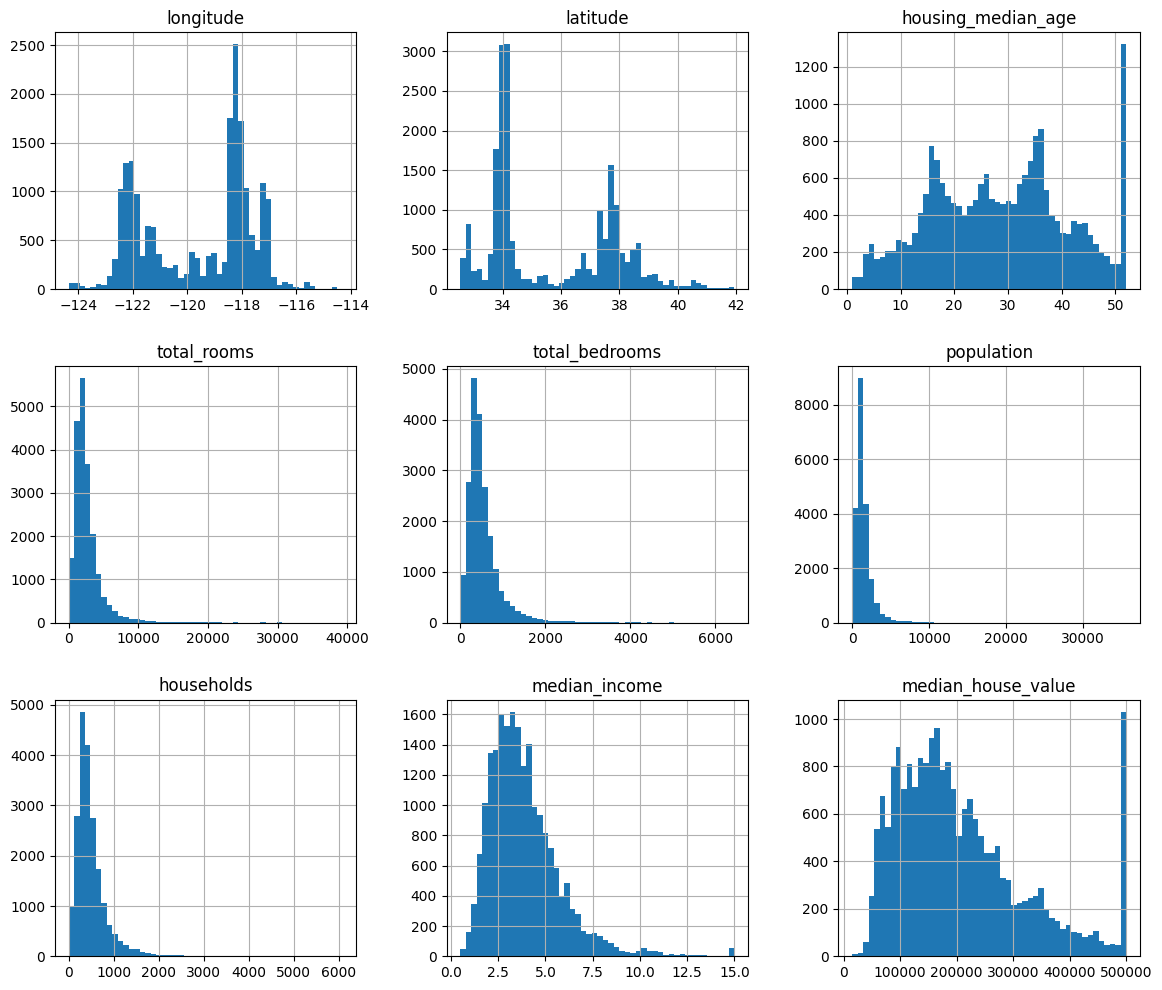

In [10]:
housing.hist(bins = 50 , figsize = (14,12))
plt.show()

In [11]:
# data = housing

In [12]:
# import numpy as np

# def shuffle_and_split_data(data , test_ratio):
#   shuffled_indices = np.random.permutation(len(data))
#   test_set_size = int(len(data)*test_ratio)
#   test_indices = shuffled_indices[:test_set_size]
#   train_indices = shuffled_indices[test_set_size:]
#   return data.iloc[train_indices] , data.iloc[test_indices]



In [13]:
# train , test = shuffle_and_split_data(data , 0.2)

# print("train: " , len(train) , "test : " , len(test))



**The above method works perfect but each time random function generates a diffrent set of indices which you want to avoid  ,sol : use seeding(But it will not work too if the dataset is updated)**

In [14]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(housing , test_size = 0.2 , random_state = 42)
print( " Train : " , len(train) , "Test : " , len(test))

 Train :  16512 Test :  4128


**It's important that your sample represents the whole population thus the sampling should be done in that way(Stratified sampling)**

In [15]:
housing['income_cat'] = pd.cut(housing["median_income"] , bins = [0.,1.5,3.0,4.5,6.,np.inf] , labels = [1,2,3,4,5])

In [16]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


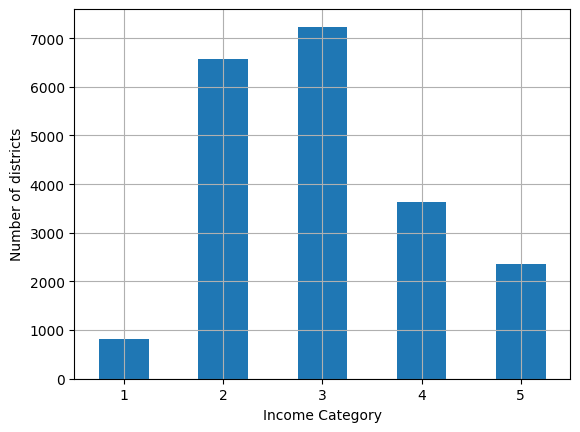

In [17]:
housing["income_cat"].value_counts().sort_index().plot.bar( rot = 0 , grid = True )
plt.xlabel("Income Category")
plt.ylabel("Number of districts")#As each instance represents a district
plt.show()

**Now making 10 different stratified splits(OTB median_cat) from the same dataset**

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state = 42)
strat_splits = []
count = 0
for trainind , testind in splitter.split(housing , housing['income_cat']):
  strat_train = housing.iloc[trainind] #split method returns indexes
  strat_test = housing.iloc[testind]
  strat_splits.append([strat_train , strat_test])
  print(count)
  count += 1

0
1
2
3
4
5
6
7
8
9


In [19]:
#Function to get a single stratified splits
strat_train_1 , strat_test_1 = train_test_split(housing , test_size = 0.2 , stratify = housing["income_cat"] , random_state = 42)

In [20]:
strat_train , strat_test = strat_splits[1]

In [21]:
#Check if it worked or not
housing["income_cat"].value_counts().sort_index()/len(housing)

,count
income_cat,
1,0.039826
2,0.318847
3,0.350581
4,0.176308
5,0.114438


In [22]:
strat_train["income_cat"].value_counts().sort_index()/len(housing)

,count
income_cat,
1,0.031831
2,0.255087
3,0.280475
4,0.141037
5,0.091570


In [23]:
for set_ in (strat_test , strat_train):
  print(count)
  count+=1
  set_.drop("income_cat" , axis = 1 , inplace = True)

10
11


<ipython-input-23-5ff933fcd7c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat" , axis = 1 , inplace = True)
<ipython-input-23-5ff933fcd7c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat" , axis = 1 , inplace = True)


In [24]:
strat_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [25]:
data = strat_train.copy()

In [26]:
import seaborn as sns

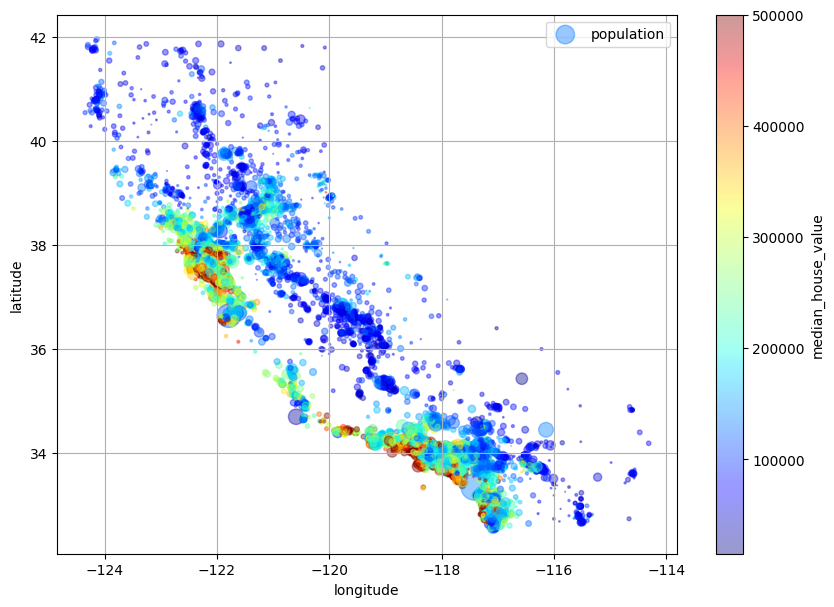

In [27]:
#sns.scatterplot( x= housing["longitude"] , y = housing["latitude"] , alpha = 0.2 , hue = housing["income_cat"] )
data.plot(kind = "scatter" , x = "longitude" , y = "latitude" , alpha = 0.4 , cmap = "jet" , c = "median_house_value" , s  = data["population"]/100 , sharex = False , colorbar = True , label = "population" , figsize = (10,7))
plt.grid(True , zorder = 10)
plt.show()

In [28]:
data2 = data.drop(columns = ["ocean_proximity"] , inplace = False)

In [29]:
# data2.drop(columns = ["income_cat"] , inplace = True)

In [30]:
corr_matrix = data2.corr()



In [31]:
corr_matrix["median_house_value"].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.686979
total_rooms,0.139821
housing_median_age,0.098470
households,0.069620
total_bedrooms,0.054386
population,-0.021894
longitude,-0.043389
latitude,-0.144899


In [32]:
data2["rooms/household"] = data2["total_rooms"]/data2["households"]

In [33]:
data2["bedroom/room"] = data2["total_bedrooms"]/data2["total_rooms"]

In [34]:
#data2["inc/person"] = data2["median_income"]/data2["population"]

In [35]:
#data2["inc/household"] = data2["median_income"]/data2["households"]

In [36]:
data2["people/household"] = data2["population"]/data2["households"]

In [37]:
corr_matrix["median_house_value"].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.686979
total_rooms,0.139821
housing_median_age,0.098470
households,0.069620
total_bedrooms,0.054386
population,-0.021894
longitude,-0.043389
latitude,-0.144899


In [38]:
from pandas.plotting import scatter_matrix

In [39]:
attributes = ["median_house_value" , "median_income" , "bedroom/room"]

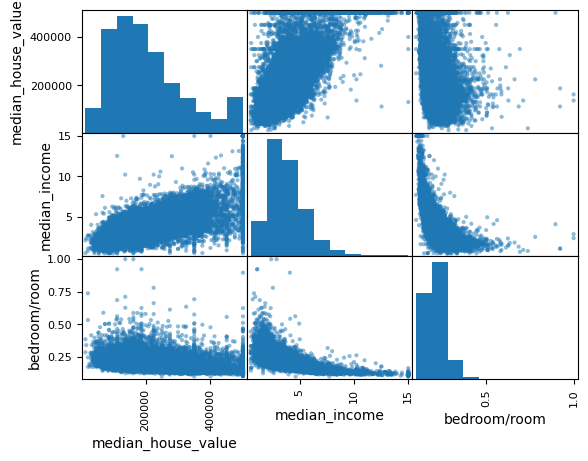

In [40]:
scatter_matrix(data2[attributes])
plt.show()

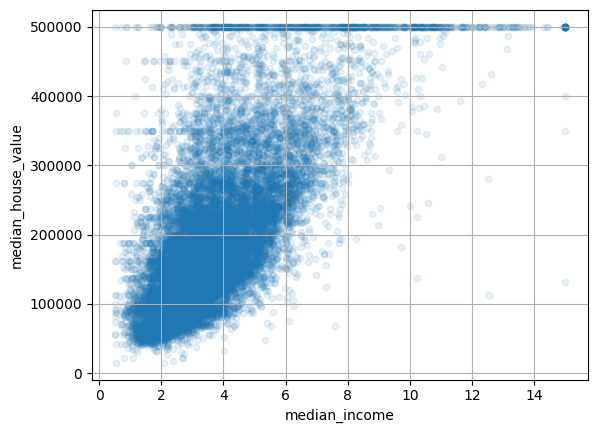

In [41]:
data2.plot(kind = "scatter"  , x = "median_income" , y = "median_house_value" ,alpha = .1, grid = True)
plt.show()

#Preparing Dataset for machine feeding

In [42]:
strat_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [43]:
data = strat_train.drop("median_house_value" , axis = 1)
data_labels = strat_train["median_house_value"].copy()

**Imputation**

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
imputer = SimpleImputer(strategy = "median")

In [46]:
data_num = data.select_dtypes(include = [np.number])

In [47]:
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [48]:
data_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [49]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2123.5   ,  434.    , 1166.    ,
        409.    ,    3.5341])

In [50]:
data_num.median().values

array([-118.49  ,   34.26  ,   29.    , 2123.5   ,  434.    , 1166.    ,
        409.    ,    3.5341])

In [51]:
X = imputer.transform(data_num)

In [80]:
print(X)

[[-1.2122e+02  3.8670e+01  2.0000e+01 ...  7.0000e+02  2.2700e+02
   4.0500e+00]
 [-1.2120e+02  3.6140e+01  1.2000e+01 ...  2.3370e+03  6.6400e+02
   3.9647e+00]
 [-1.2274e+02  3.8430e+01  1.1000e+01 ...  2.4300e+03  9.6200e+02
   3.0341e+00]
 ...
 [-1.1821e+02  3.3880e+01  2.9000e+01 ...  1.2540e+03  3.7100e+02
   2.1782e+00]
 [-1.1844e+02  3.4290e+01  3.2000e+01 ...  1.4340e+03  3.4200e+02
   2.0286e+00]
 [-1.1852e+02  3.4200e+01  3.7000e+01 ...  1.0820e+03  3.5400e+02
   4.9102e+00]]


In [52]:
data_num.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,164
population,0
households,0
median_income,0


In [53]:
data_num_t = pd.DataFrame(X , index = data_num.index , columns = data_num.columns)

In [54]:
data_num_t.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0


In [55]:
data_cat = data[["ocean_proximity"]]
data_cat.head(7)

,ocean_proximity
13027,INLAND
9783,<1H OCEAN
19268,<1H OCEAN
14436,NEAR OCEAN
469,NEAR BAY
18105,<1H OCEAN
17301,NEAR OCEAN


In [56]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

data_cat_en = ordinal_encoder.fit_transform(data_cat)

In [57]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [58]:
data_cat_en

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

**The numerical data represents is only good for ordered data**

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
cat_encoder = OneHotEncoder()

In [61]:
data_cat_oe = cat_encoder.fit_transform(data_cat)

In [62]:
data_cat_oe.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [63]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [64]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#Custom Transformers (With New Stratified sample)

In [65]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [66]:
from sklearn.preprocessing import FunctionTransformer



log_transformer = FunctionTransformer(np.log , inverse_func = np.exp)

log_pop = log_transformer.transform(housing[["population"]])

<Axes: ylabel='Frequency'>

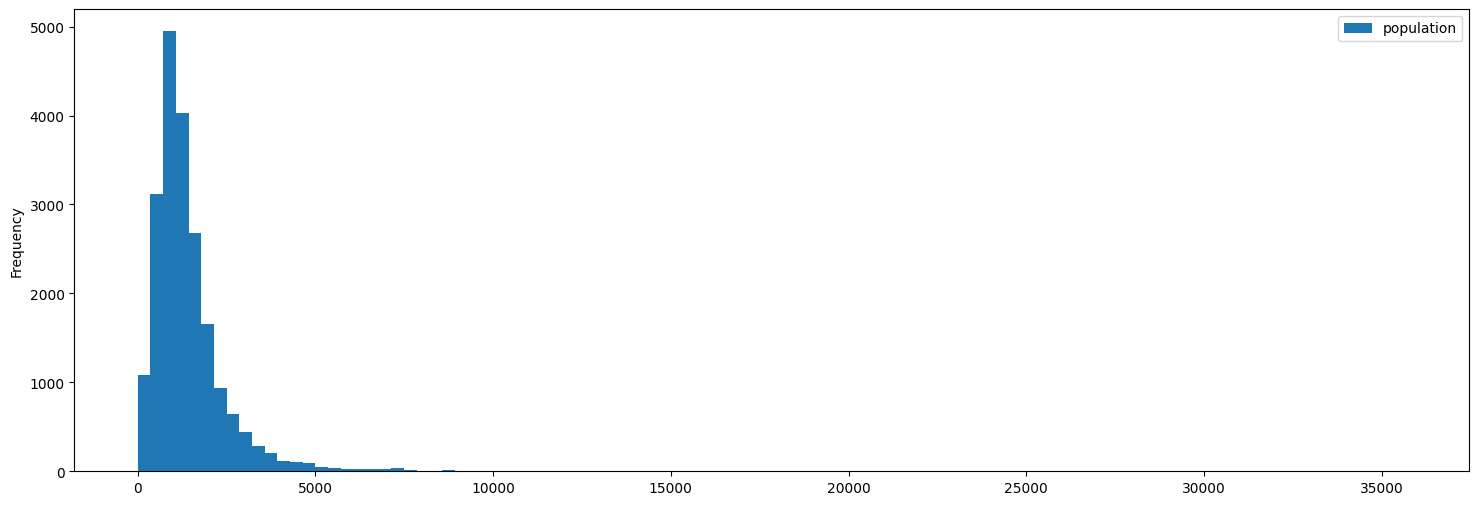

In [67]:
housing[['population']].plot(kind = 'hist' ,bins = 100, figsize = (18,6))

<Axes: ylabel='Frequency'>

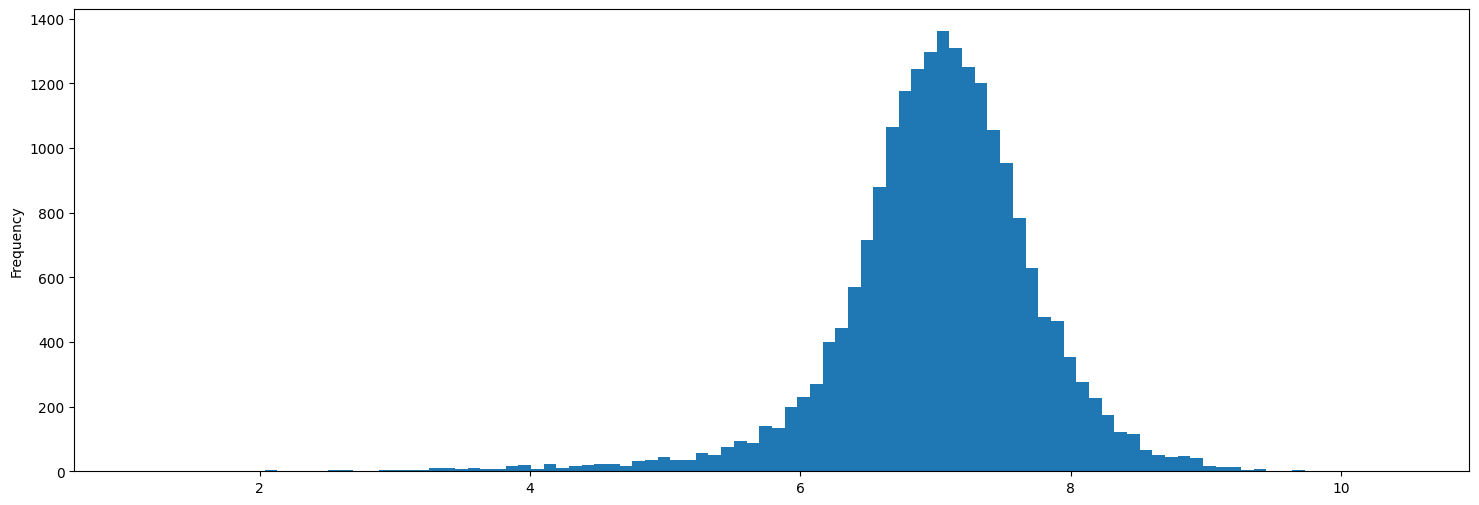

In [68]:
log_pop["population"].plot(kind = "hist" , bins = 100 , figsize = (18,6))

**RBF gaussion fiuntion**

In [69]:
from sklearn.metrics.pairwise import rbf_kernel

In [70]:
rbf_transformer = FunctionTransformer(rbf_kernel , kw_args = dict(Y = [[35.]] , gamma = 0.1))

age_sim_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [71]:
sf_coord  = 37.7749 , -122.41
sf_transformer = FunctionTransformer(rbf_kernel , kw_args = dict( Y = [sf_coord] , gamma = 0.1))
sf_sim_geo = sf_transformer.transform(housing[["latitude" , "longitude"]])

##Making transformer pipelines

In [83]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer , make_column_selector

In [84]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy = "mean"),
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown = "ignore")
)

In [85]:
preprocessing = make_column_transformer(
    (num_pipeline , make_column_selector(dtype_include = np.number)),
    (cat_pipeline , make_column_selector(dtype_include = object))
)

In [86]:
housing = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [87]:
housing_prepared =preprocessing.fit_transform(housing)

In [91]:
preprocessing.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-1__median_house_value'], dtype=object)

#Restart

In [ ]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator , TransformerMixin

In [ ]:
class ClusterSimilarity(BaseEstimator , TransformerMixin):
  def __init__(self , n_clusters = 10 , gamma = 0.1 , random_state = None):
    self.nclusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state

  def fit(self , X , y = None , sample_weight = None):
    self.kmeans_ = KMeans(self.n_clusters , random_state = self.random_state)
    self.kmeans_.fit(X , sample_weight = sample_weight)
    return self
  def transform(self, X):
    return rbf_kernel(X , self.kmeans_.cluster_centers , gamma = self.gamma)

  def get_feature_names_out(self , names = None):
    return [f"Cluster {i} similarity" for i in range(self.n_clusters)]



```
The transform step is where the magic happens. It's responsible for taking your input data and creating new features based on the similarity to the clusters learned during the fit step.

Here's how it works:

Input:

The transform method takes your input data, denoted by X. Let's imagine X is a simple dataset with two features, like this:

X = [[1, 2],
        [3, 4],
        [5, 6]]
Use code with caution
Cluster Centers:

During the fit step, the KMeans algorithm has already identified cluster centers. Let's say we found two clusters with centers at:

cluster_centers_ = [[2, 3],
                       [4, 5]]
Use code with caution
RBF Kernel:

The heart of the transformation is the rbf_kernel function. It measures the similarity between each data point in X and each cluster center. It uses a Gaussian function (also known as a radial basis function) to calculate this similarity.

The formula for the RBF kernel is:


similarity = exp(-gamma * ||x - c||^2)
Use code with caution
 - `x` is a data point from `X`.
 - `c` is a cluster center.
 - `gamma` is a parameter that controls the width of the Gaussian function.
 - `||x - c||^2` is the squared Euclidean distance between `x` and `c`.
In simpler terms, the RBF kernel gives a high similarity score if a data point is close to a cluster center and a low similarity score if it's far away.
Calculation:

Let's apply the RBF kernel to our example with gamma = 0.1:

For the first data point [1, 2] and the first cluster center [2, 3]:

       similarity = exp(-0.1 * ||[1, 2] - [2, 3]||^2)
                  = exp(-0.1 * (1^2 + 1^2))
                  = exp(-0.2)
                  ≈ 0.819
Use code with caution
 - We repeat this calculation for all data points and cluster centers.
Output:

The result of the transform method is a new feature matrix where each column represents the similarity to a specific cluster:

transformed_X = [[0.819, 0.549],  # Similarity of [1, 2] to cluster 1 and cluster 2
                      [0.819, 0.819],  # Similarity of [3, 4] to cluster 1 and cluster 2
                      [0.549, 0.819]]  # Similarity of [5, 6] to cluster 1 and cluster 2
Use code with caution
In summary, the transform step takes your original data and generates new features that capture how similar each data point is to each of the clusters. These new features can help your machine learning models better understand the structure of your data and potentially improve their performance.
```



In [ ]:
def column_ratio(X):
  return X[: , [0]]/X[: , [1]]

In [ ]:
def ratio_name(function_tranformer , feature_names_in):
  return ["ratio"]

In [ ]:
def ratio_pipeline():
  return make_pipeline(SimpleImputer(strategy = "median"),
                       FunctionTranformer(column_ratio , feature_names_out = ratio_name) ,
                       StandardScaler())

In [ ]:
log_pipeline = make_pipeline(SimpleImputer(strategy = "median"),
                             FunctionTransformer(np.log , feature_names_out = "one_to_one"),
                             StandardScaler())
cluster_simil = ClusterSimilarity()